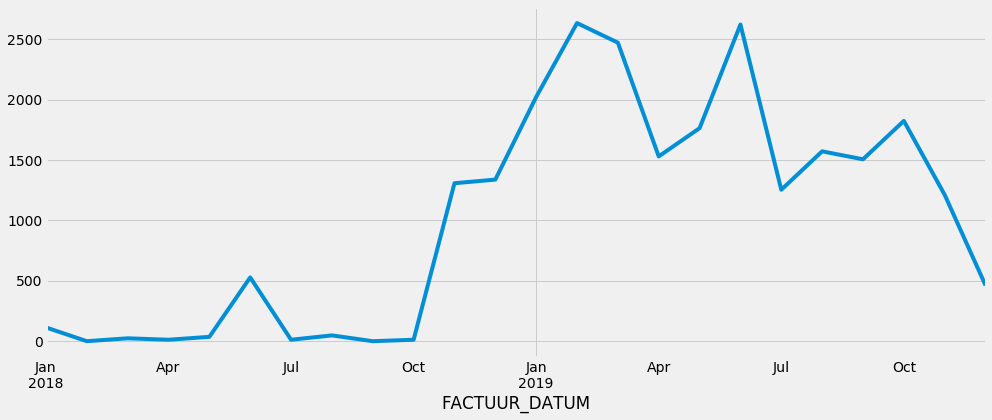

In [3]:
import warnings
import itertools
import pandas as pd
import numpy as np
from pandas import read_csv
import statsmodels.api as sm
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

y = read_csv('/Users/mac/Desktop/OrderPredictions/dfp_100017_monthly.csv', header=0, parse_dates=[0], index_col=0, squeeze=True)
y.plot(figsize=(15, 6))
plt.show()

In [4]:
print(y)

FACTUUR_DATUM
2018-01-31     114.0
2018-02-28       0.0
2018-03-31      24.0
2018-04-30      12.0
2018-05-31      36.0
2018-06-30     528.0
2018-07-31      12.0
2018-08-31      48.0
2018-09-30       0.0
2018-10-31      12.0
2018-11-30    1308.0
2018-12-31    1338.0
2019-01-31    2022.0
2019-02-28    2634.0
2019-03-31    2472.0
2019-04-30    1530.0
2019-05-31    1764.0
2019-06-30    2622.0
2019-07-31    1254.0
2019-08-31    1572.0
2019-09-30    1506.0
2019-10-31    1824.0
2019-11-30    1212.0
2019-12-31     462.0
Name: NETTO_GEWICHT_KG, dtype: float64


In [5]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [6]:
warnings.filterwarnings("ignore") # specify to ignore warning messages

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:400.2441437679733
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:197.21049423214498
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:217.1630380473213
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:366.2737399663114
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:170.6458342931314
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:208.4695875555802
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:345.4375134352067
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:163.7961813644354
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:178.6456817930828
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:332.20104440319045
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:150.44836956821382
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:177.55157174382472
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:361.08850337009386
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:180.70789549695644
ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:179.47317772987742
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:348.2298672831853
ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:165.52345663936757
ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:175.6569284541219
AR

In [7]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(1, 0, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2042      0.530     -0.385      0.700      -1.243       0.834
ma.L1         -0.6997      0.811     -0.863      0.388      -2.290       0.890
ar.S.L12      -0.4907      0.522     -0.940      0.347      -1.514       0.533
sigma2        3.2e+05   3.49e+05      0.918      0.359   -3.63e+05       1e+06


In [8]:
pred = results.get_prediction(start=pd.to_datetime('2019-09-30'), dynamic=False)
pred_ci = pred.conf_int()

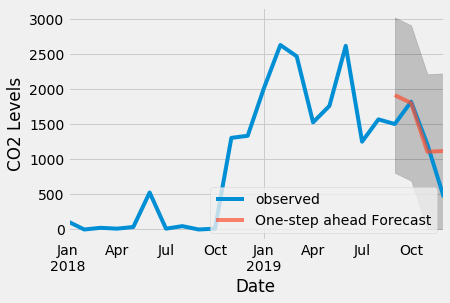

In [9]:
ax = y['2018':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('CO2 Levels')
plt.legend()

plt.show()

In [10]:
y_forecasted = pred.predicted_mean
y_truth = y['2019-09-30':]

# Compute the mean square error
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 153674.13


In [11]:
pred_dynamic = results.get_prediction(start=pd.to_datetime('2019-09-30'), dynamic=True, full_results=True)
pred_dynamic_ci = pred_dynamic.conf_int()

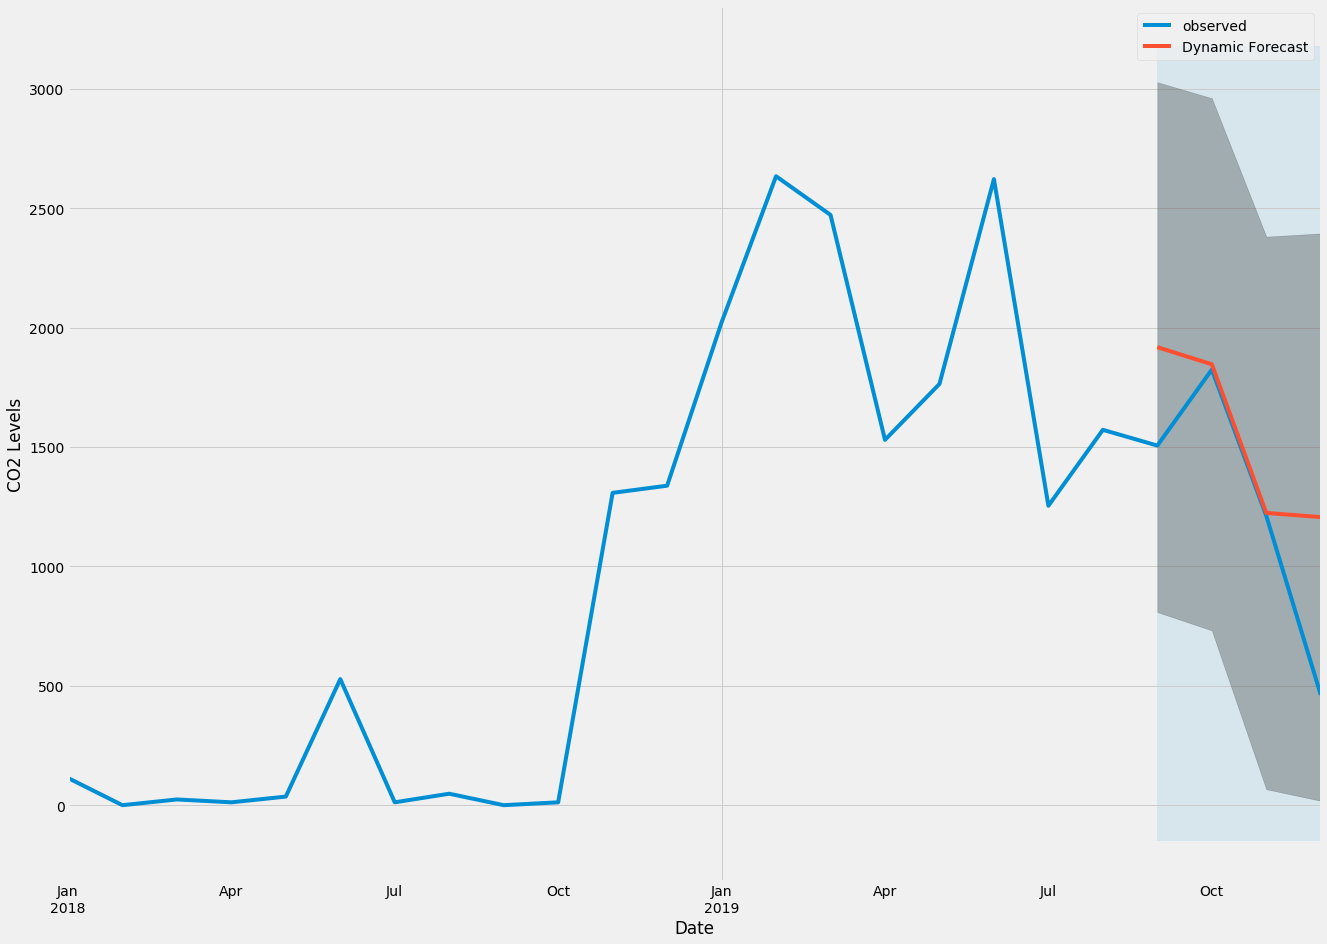

In [12]:
ax = y['2018':].plot(label='observed', figsize=(20, 15))
pred_dynamic.predicted_mean.plot(label='Dynamic Forecast', ax=ax)

ax.fill_between(pred_dynamic_ci.index,
                pred_dynamic_ci.iloc[:, 0],
                pred_dynamic_ci.iloc[:, 1], color='k', alpha=.25)

ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('2019-09-30'), y.index[-1],
                 alpha=.1, zorder=-1)

ax.set_xlabel('Date')
ax.set_ylabel('CO2 Levels')

plt.legend()
plt.show()

In [13]:
y_forecasted = pred_dynamic.predicted_mean
y_truth = y['2019-09-30':]

# Compute the mean square error
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 181207.59


In [14]:
# Get forecast 500 steps ahead in future

pred_uc = results.get_forecast(10)

# Get confidence intervals of forecasts
pred_ci = pred_uc.conf_int()

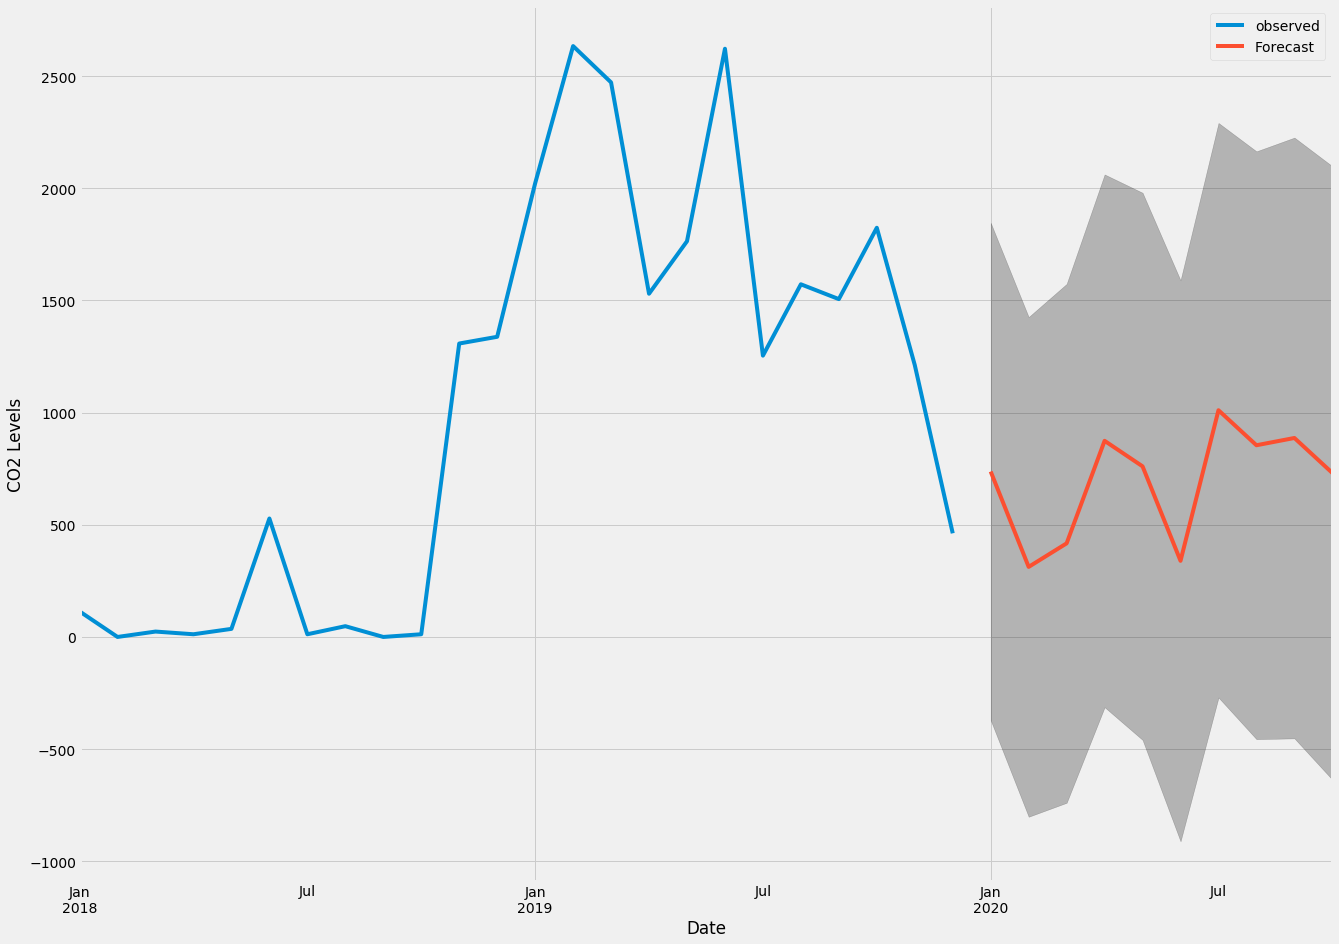

In [15]:
ax = y.plot(label='observed', figsize=(20, 15))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('CO2 Levels')

plt.legend()
plt.show()

In [16]:
pred_ci

,lower NETTO_GEWICHT_KG,upper NETTO_GEWICHT_KG
2020-01-31,-371.336185,1846.101739
2020-02-29,-801.503825,1426.113278
2020-03-31,-739.193194,1573.750418
2020-04-30,-313.145824,2061.728732
2020-05-31,-458.997378,1980.069438
2020-06-30,-911.101452,1589.738198
2020-07-31,-270.029979,2291.246753
2020-08-31,-455.580603,2164.708908
2020-09-30,-452.053502,2225.954826
2020-10-31,-636.338839,2098.169047


In [17]:
pred_uc.predicted_mean

2020-01-31     737.382777
2020-02-29     312.304727
2020-03-31     417.278612
2020-04-30     874.291454
2020-05-31     760.536030
2020-06-30     339.318373
2020-07-31    1010.608387
2020-08-31     854.564153
2020-09-30     886.950662
2020-10-31     730.915104
Freq: M, dtype: float64

In [18]:
pred_ci['Prediction'] = pred_ci[['lower NETTO_GEWICHT_KG', 'upper NETTO_GEWICHT_KG']].mean(axis=1)

In [19]:
pred_ci

,lower NETTO_GEWICHT_KG,upper NETTO_GEWICHT_KG,Prediction
2020-01-31,-371.336185,1846.101739,737.382777
2020-02-29,-801.503825,1426.113278,312.304727
2020-03-31,-739.193194,1573.750418,417.278612
2020-04-30,-313.145824,2061.728732,874.291454
2020-05-31,-458.997378,1980.069438,760.536030
2020-06-30,-911.101452,1589.738198,339.318373
2020-07-31,-270.029979,2291.246753,1010.608387
2020-08-31,-455.580603,2164.708908,854.564153
2020-09-30,-452.053502,2225.954826,886.950662
2020-10-31,-636.338839,2098.169047,730.915104
